In [7]:
def back_sub(R, b_tilde):
    n = R.shape[0]
    x = np.zeros(n)
    for i in reversed(range(n)):
        x[i] = b_tilde[i]
        for j in range(i+1, n):
            x[i] = x[i] - R[i][j]*x[j]
        x[i] = x[i]/R[i,i]
    return x

def solve_via_backsub(A, b):
    Q, R = np.linalg.qr(A)
    b_tilde = Q.T @ b
    return back_sub(R, b_tilde)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
import json
f = open('wildfire_data.json')
f = json.load(f)

In [10]:
f1 = np.array(f['U']['data'])

In [11]:
target = f['v']['data']

In [12]:
features = pd.DataFrame({'x': f1[:,0],
                         'y': f1[:,1],
                         'month': f1[:,2],
                        'FFMC': f1[:,3],
                        'temp': f1[:,4],
                        'wind': f1[:,5],
                        'rain': f1[:,6],
                        'area': target})

In [14]:
I = np.random.permutation(features.shape[0])
t = int(np.floor(features.shape[0]*0.8))
Itrain = I[:t]
Itest = I[t:]
train = features.iloc[Itrain]
test = features.iloc[Itest]

In [15]:
train.describe()

,x,y,month,FFMC,temp,wind,rain,area
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,4.636804,4.259080,7.440678,90.562228,18.831719,4.099274,0.026634,1.116448
std,2.310550,1.237832,2.325354,5.946495,5.879806,1.814672,0.330882,1.392939
min,1.000000,2.000000,1.000000,18.700000,2.200000,0.900000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,90.200000,15.400000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,91.600000,19.300000,4.000000,0.000000,0.438255
75%,7.000000,5.000000,9.000000,92.800000,22.800000,5.400000,0.000000,2.057963
max,9.000000,9.000000,12.000000,96.200000,33.300000,9.400000,6.400000,6.995620


In [16]:
test.describe()

,x,y,month,FFMC,temp,wind,rain,area
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,4.798077,4.461538,7.615385,90.972115,19.117308,3.693269,0.001923,1.089495
std,2.333296,1.189950,2.072978,3.327947,5.527889,1.666184,0.019612,1.426674
min,1.000000,2.000000,2.000000,75.100000,4.600000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.750000,90.075000,16.400000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,91.600000,19.350000,3.100000,0.000000,0.332580
75%,7.000000,5.000000,9.000000,92.900000,22.800000,4.900000,0.000000,2.005526
max,9.000000,9.000000,12.000000,96.200000,32.600000,8.900000,0.200000,5.633110


In [17]:
normalized_train = (train - train.mean())/train.std()

In [18]:
normalized_train.describe()

,x,y,month,FFMC,temp,wind,rain,area
count,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02
mean,-1.204310e-16,2.049746e-16,9.032323e-17,7.659598e-15,-1.052158e-15,-1.940874e-16,-2.224478e-16,-8.924795e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.573999e+00,-1.825029e+00,-2.769762e+00,-1.208480e+01,-2.828617e+00,-1.763004e+00,-8.049505e-02,-8.015049e-01
25%,-7.084044e-01,-2.093013e-01,-1.895100e-01,-6.091447e-02,-5.836449e-01,-7.710891e-01,-8.049505e-02,-8.015049e-01
50%,-2.756070e-01,-2.093013e-01,2.405319e-01,1.745183e-01,7.964223e-02,-5.470610e-02,-8.049505e-02,-4.868788e-01
75%,1.022785e+00,5.985625e-01,6.705739e-01,3.763179e-01,6.748999e-01,7.167833e-01,-8.049505e-02,6.759197e-01
max,1.888380e+00,3.830018e+00,1.960700e+00,9.480833e-01,2.460673e+00,2.921039e+00,1.926173e+01,4.220696e+00


In [19]:
normalized_test = (test - train.mean())/train.std()

In [20]:
normalized_test.describe()

,x,y,month,FFMC,temp,wind,rain,area
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,0.069799,0.163559,0.075131,0.068929,0.048571,-0.223734,-0.074683,-0.019349
std,1.009844,0.961318,0.891467,0.559649,0.940148,0.918174,0.059271,1.024218
min,-1.573999,-1.825029,-2.339720,-2.600225,-2.420440,-2.038536,-0.080495,-0.801505
25%,-0.708404,-0.209301,0.133021,-0.081935,-0.413571,-0.771089,-0.080495,-0.801505
50%,-0.275607,-0.209301,0.240532,0.174518,0.088146,-0.550664,-0.080495,-0.562744
75%,1.022785,0.598562,0.670574,0.393135,0.674900,0.441251,-0.080495,0.638275
max,1.888380,3.830018,1.960700,0.948083,2.341621,2.645507,0.523950,3.242541


In [21]:
month = np.zeros((train.shape[0], 12))
count = 0
for i in train['month']:
    month[count, int(i)-1] = 1
    count += 1
normalized_month = (month-np.mean(month))/np.std(month)

In [22]:
month2 = np.zeros((test.shape[0], 12))
count = 0
for i in test['month']:
    month2[count, int(i)-1] = 1
    count += 1
normalized_month2 = (month2-np.mean(month))/np.std(month)

In [24]:
pi = np.pi
sin_month = np.zeros((train.shape[0], 2))
count = 0
for i in train['month']:
    sin_month[count][0] = np.sin(2*pi*i/12)
    sin_month[count][1] = np.cos(2*pi*i/12)

In [27]:
sin_month2 = np.zeros((test.shape[0],2))
count = 0 
for i in test['month']:
    sin_month2[count][0] = np.sin(2*pi*i/12)
    sin_month2[count][1] = np.cos(2*pi*i/12)

In [28]:
norm_sin_month = (sin_month - np.mean(sin_month))/np.std(sin_month)
norm_sin_month2 = (sin_month2 - np.mean(sin_month))/np.std(sin_month)

In [25]:
train['month']

14     8.0
268    8.0
74     8.0
336    8.0
57     8.0
      ... 
261    8.0
477    8.0
345    9.0
29     3.0
383    3.0
Name: month, Length: 413, dtype: float64

In [29]:
A = np.column_stack((np.ones(normalized_train.shape[0]), normalized_train[['x','y']], normalized_month, normalized_train[['FFMC', 'temp', 'wind', 'rain']]))
Atest = np.column_stack((np.ones(normalized_test.shape[0]), normalized_test[['x','y']], normalized_month2, normalized_test[['FFMC', 'temp', 'wind', 'rain']]))
b = np.array(target)[Itrain]
btest = np.array(target)[Itest]

In [30]:
print(A[0])
print(Atest[0])

[ 1.          1.45558237  1.40642625 -0.30151134 -0.30151134 -0.30151134
 -0.30151134 -0.30151134 -0.30151134 -0.30151134  3.31662479 -0.30151134
 -0.30151134 -0.30151134 -0.30151134  0.52766754  0.01161278  0.44125138
 -0.08049505]
[ 1.          0.58998767  0.59856249 -0.30151134 -0.30151134 -0.30151134
 -0.30151134 -0.30151134  3.31662479 -0.30151134 -0.30151134 -0.30151134
 -0.30151134 -0.30151134 -0.30151134 -0.02728121  0.31774531  0.44125138
 -0.08049505]


In [31]:
lambdas = 10**np.linspace(-1, 5, num=200)

In [32]:
theta = np.zeros((200, A.shape[1]))
rmse = np.zeros(200)
trmse = np.zeros(200)

In [33]:
for i in range(200):
    A_tilde = np.vstack((A,np.sqrt(lambdas[i])*np.eye(A.shape[1])))
    b_tilde = np.hstack((b, np.zeros(A.shape[1])))
    theta[i] = solve_via_backsub(A_tilde, b_tilde)
    rmse[i] = (sum((A@theta[i]-b)**2)/len(b))**0.5
    trmse[i] = (sum((Atest@theta[i]-btest)**2)/len(btest))**0.5

Text(0.5, 0, 'lambdas')

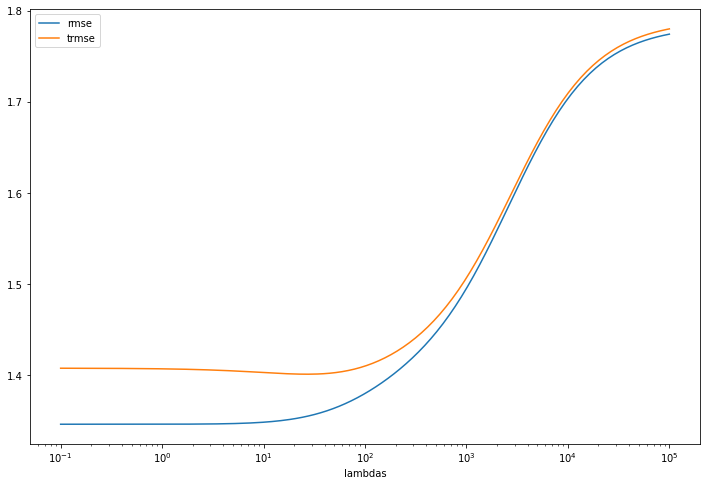

In [34]:
plt.figure(figsize=(12,8))
plt.xscale('log')
plt.plot(lambdas, rmse)
plt.plot(lambdas, trmse)
plt.legend(['rmse', 'trmse'])
plt.xlabel('lambdas')

In [35]:
np.argmin(trmse)

80

In [37]:
A = np.column_stack((np.ones(normalized_train.shape[0]), normalized_train[['x','y']], norm_sin_month, normalized_train[['FFMC', 'temp', 'wind', 'rain']]))
Atest = np.column_stack((np.ones(normalized_test.shape[0]), normalized_test[['x','y']], norm_sin_month2, normalized_test[['FFMC', 'temp', 'wind', 'rain']]))
b = np.array(target)[Itrain]
btest = np.array(target)[Itest]

In [38]:
lambdas = 10**np.linspace(-1, 5, num=200)
theta = np.zeros((200, A.shape[1]))
rmse = np.zeros(200)
trmse = np.zeros(200)

In [39]:
for i in range(200):
    A_tilde = np.vstack((A,np.sqrt(lambdas[i])*np.eye(A.shape[1])))
    b_tilde = np.hstack((b, np.zeros(A.shape[1])))
    theta[i] = solve_via_backsub(A_tilde, b_tilde)
    rmse[i] = (sum((A@theta[i]-b)**2)/len(b))**0.5
    trmse[i] = (sum((Atest@theta[i]-btest)**2)/len(btest))**0.5

Text(0.5, 0, 'lambdas')

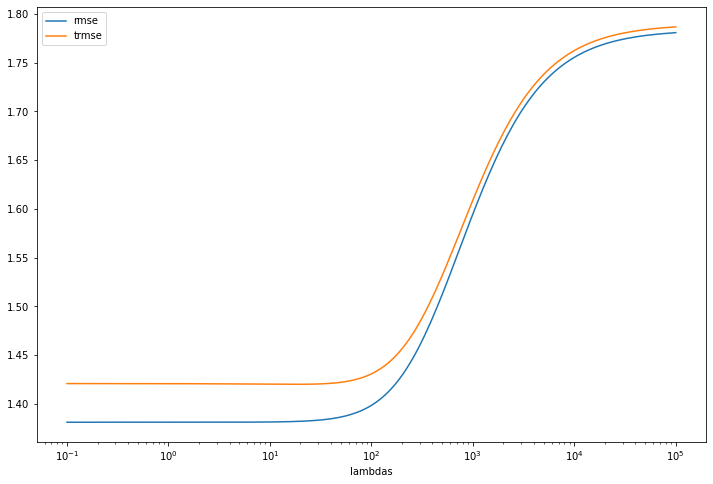

In [40]:
plt.figure(figsize=(12,8))
plt.xscale('log')
plt.plot(lambdas, rmse)
plt.plot(lambdas, trmse)
plt.legend(['rmse', 'trmse'])
plt.xlabel('lambdas')

In [41]:
np.argmin(trmse)

74